In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

/Users/kenny_jung/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
tf.__version__

'2.15.0'

In [3]:
# Load dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Examine the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
import numpy as np
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

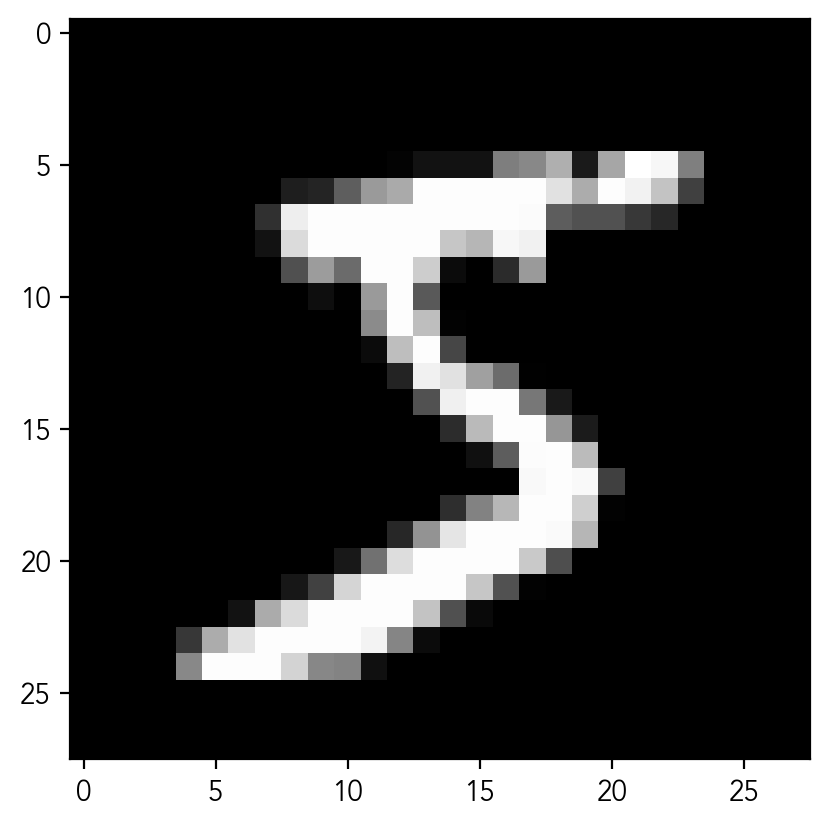

In [6]:
plt.imshow(X_train[0], cmap='gray')

In [7]:
y_train[0]

5

In [8]:
# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
# Train
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 878us/step - loss: 2.5337 - accuracy: 0.8860
Epoch 2/5
1875/1875 [==============================] - 2s 877us/step - loss: 0.3245 - accuracy: 0.9301
Epoch 3/5
1875/1875 [==============================] - 2s 885us/step - loss: 0.2711 - accuracy: 0.9388
Epoch 4/5
1875/1875 [==============================] - 2s 887us/step - loss: 0.2515 - accuracy: 0.9422
Epoch 5/5
1875/1875 [==============================] - 2s 882us/step - loss: 0.2326 - accuracy: 0.9471


Text(0.5, 0, 'Epoch')

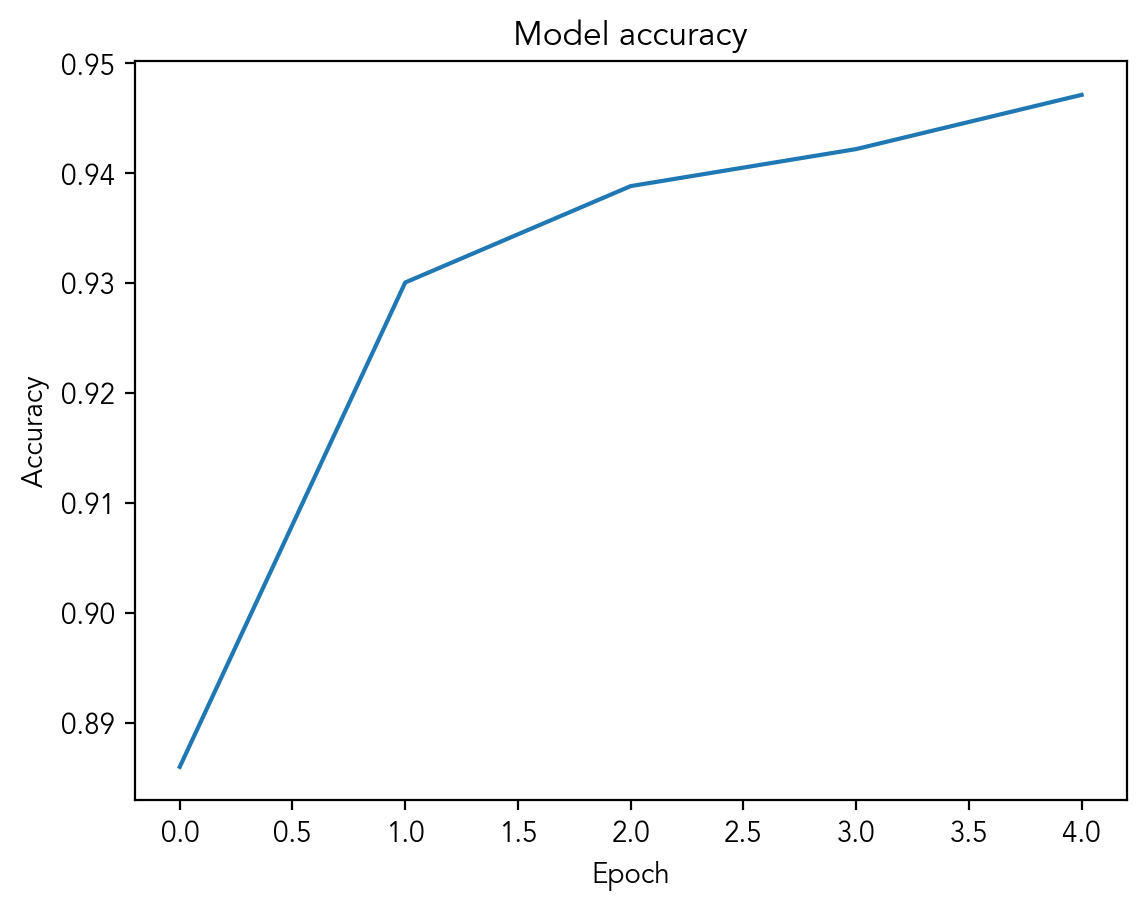

In [12]:
# Evaluate
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

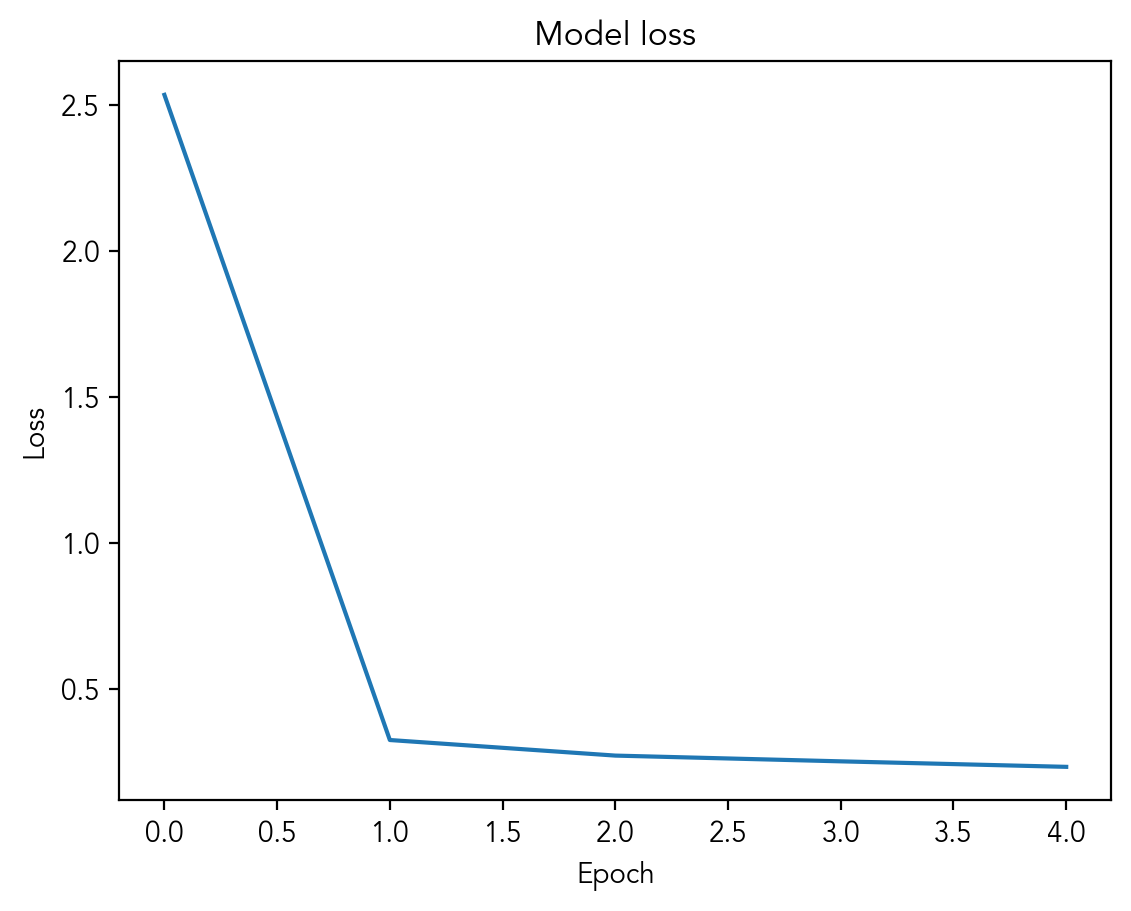

In [13]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [14]:
# Feshion MNIST
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

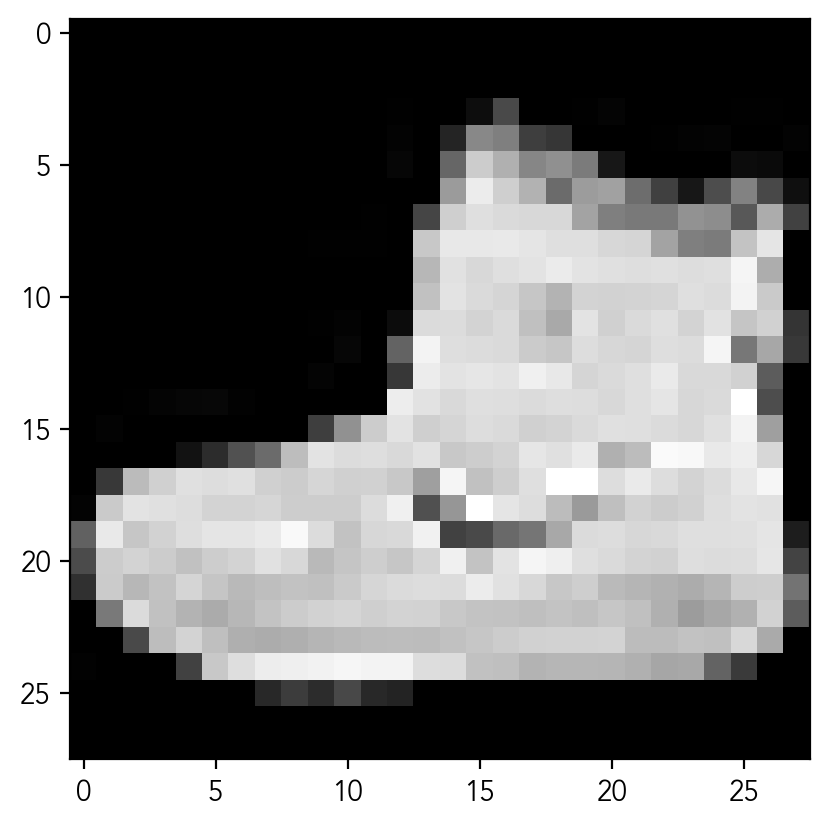

In [16]:
# Examine the data
plt.imshow(X_train[0], cmap='gray')

In [17]:
y_train[0]

9

In [18]:
# Labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
classes[y_train[0]]

'Ankle boot'

T-shirt/top


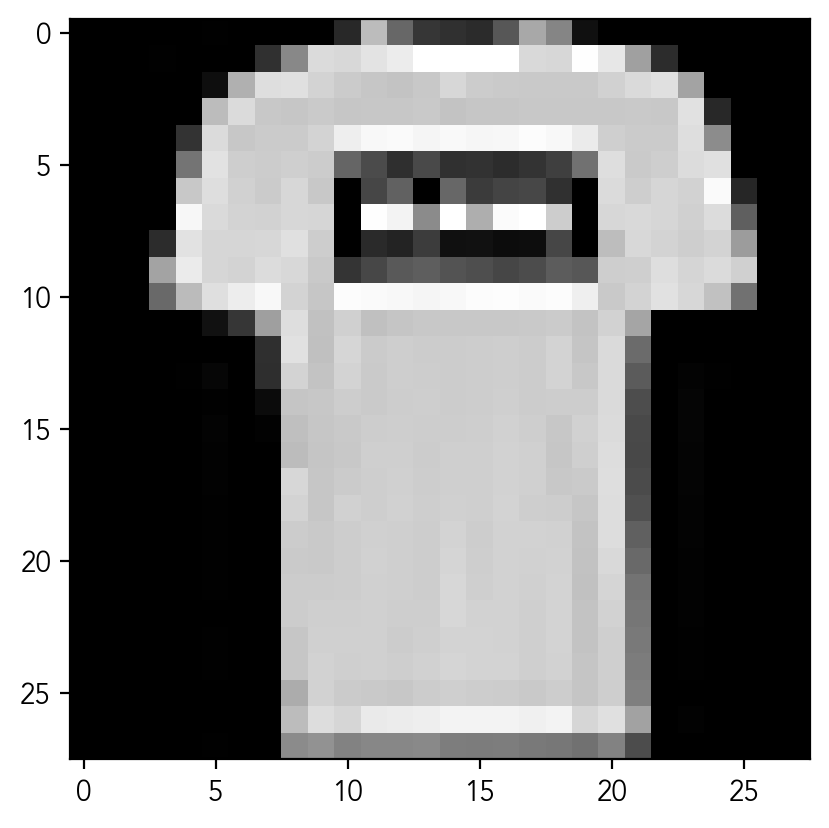

In [19]:
print(classes[y_train[1]])
plt.imshow(X_train[1], cmap='gray')

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
# Train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5258 - accuracy: 0.8133 - val_loss: 0.4322 - val_accuracy: 0.8453
Epoch 2/10
1875/1875 [==============================] - 2s 891us/step - loss: 0.3966 - accuracy: 0.8562 - val_loss: 0.3935 - val_accuracy: 0.8561
Epoch 3/10
1875/1875 [==============================] - 2s 933us/step - loss: 0.3673 - accuracy: 0.8654 - val_loss: 0.3711 - val_accuracy: 0.8661
Epoch 4/10
1875/1875 [==============================] - 2s 961us/step - loss: 0.3437 - accuracy: 0.8743 - val_loss: 0.3558 - val_accuracy: 0.8728
Epoch 5/10
1875/1875 [==============================] - 2s 987us/step - loss: 0.3295 - accuracy: 0.8790 - val_loss: 0.3556 - val_accuracy: 0.8737
Epoch 6/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.3152 - accuracy: 0.8840 - val_loss: 0.3495 - val_accuracy: 0.8741
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3077 - accuracy: 0.8862 - val_loss: 0.3673 - val

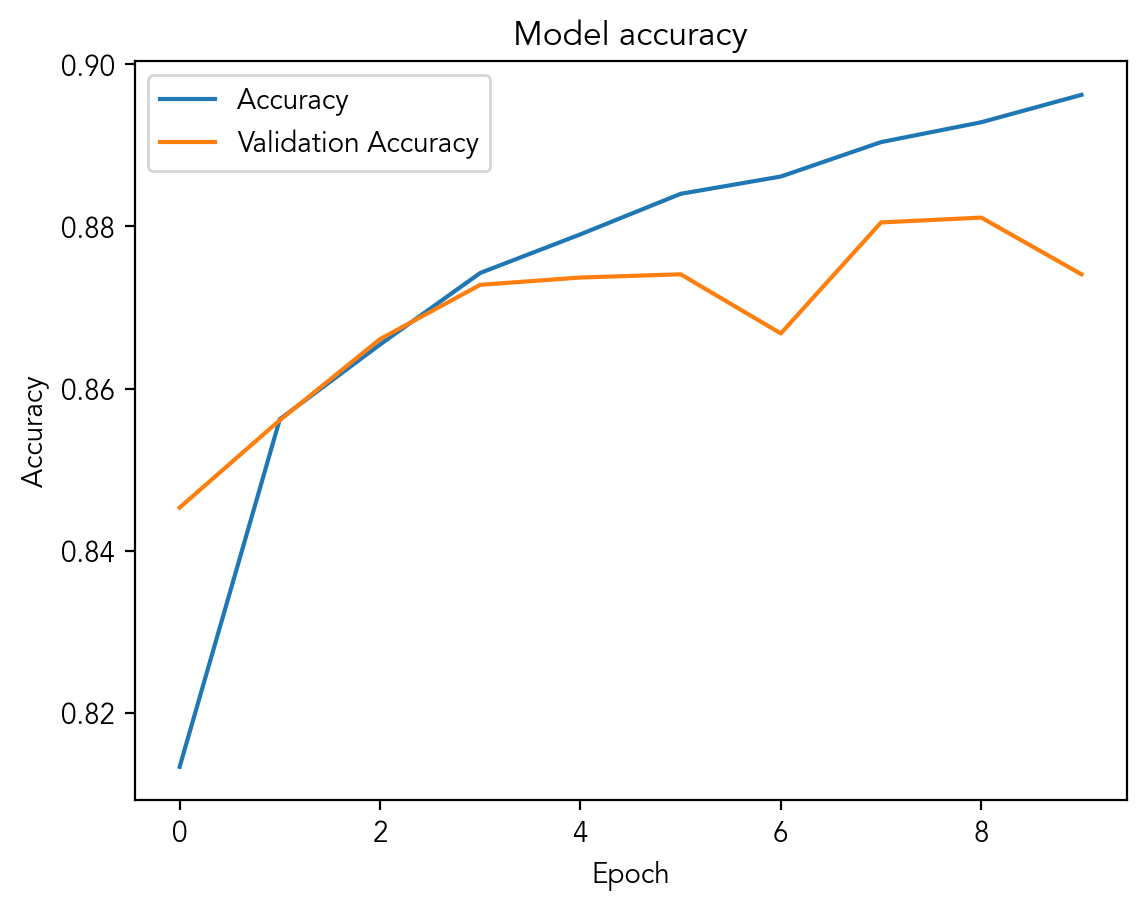

In [22]:
# Evaluate
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

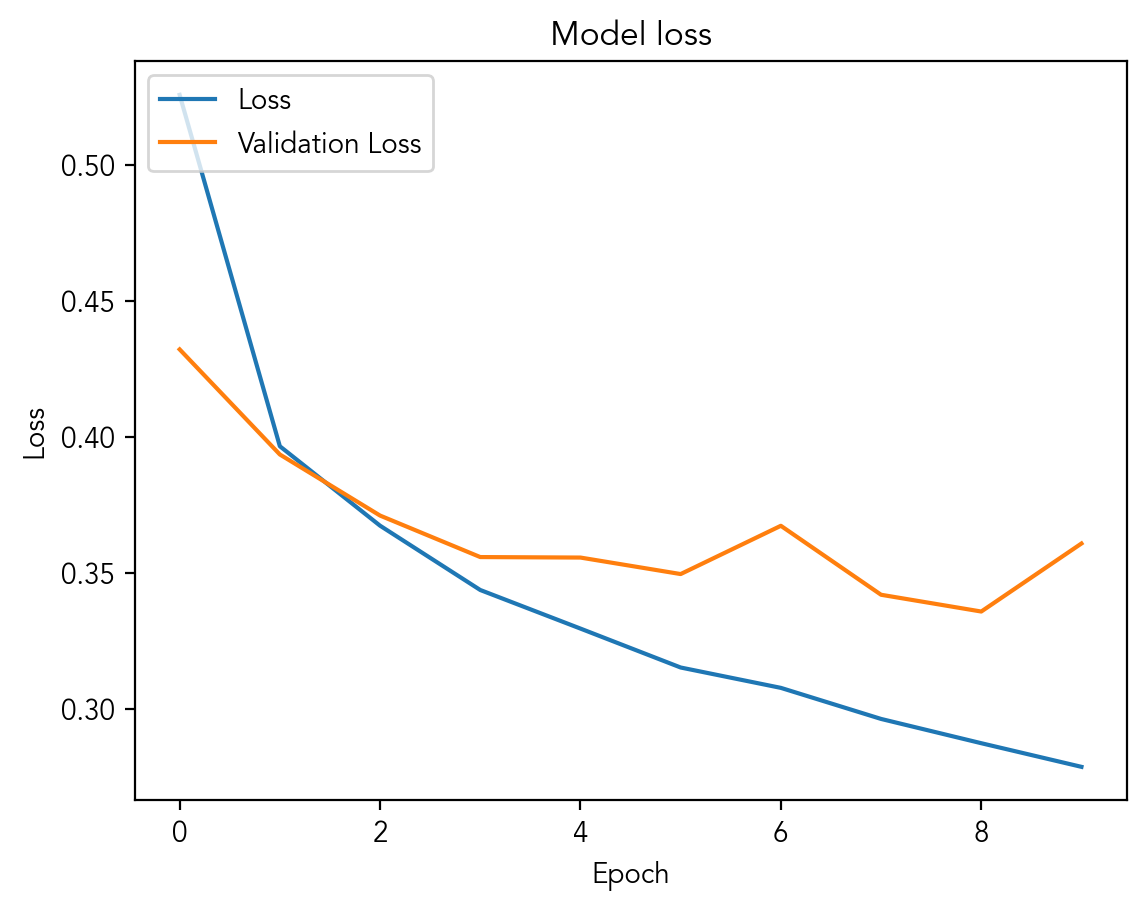

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')

In [24]:
# Predict
pred = model.predict(X_test)
pred[0]

313/313 [==============================] - 0s 495us/step


array([2.2187517e-06, 5.8788032e-09, 5.8435856e-10, 5.1871324e-10, 6.7726327e-09, 7.6205977e-03, 1.7581229e-07,
       1.5520015e-02, 3.7178910e-07, 9.7685665e-01], dtype=float32)

In [25]:
np.argmax(pred[0])

9

In [26]:
classes[np.argmax(pred[0])]

'Ankle boot'

In [27]:
classes[y_test[0]]

'Ankle boot'

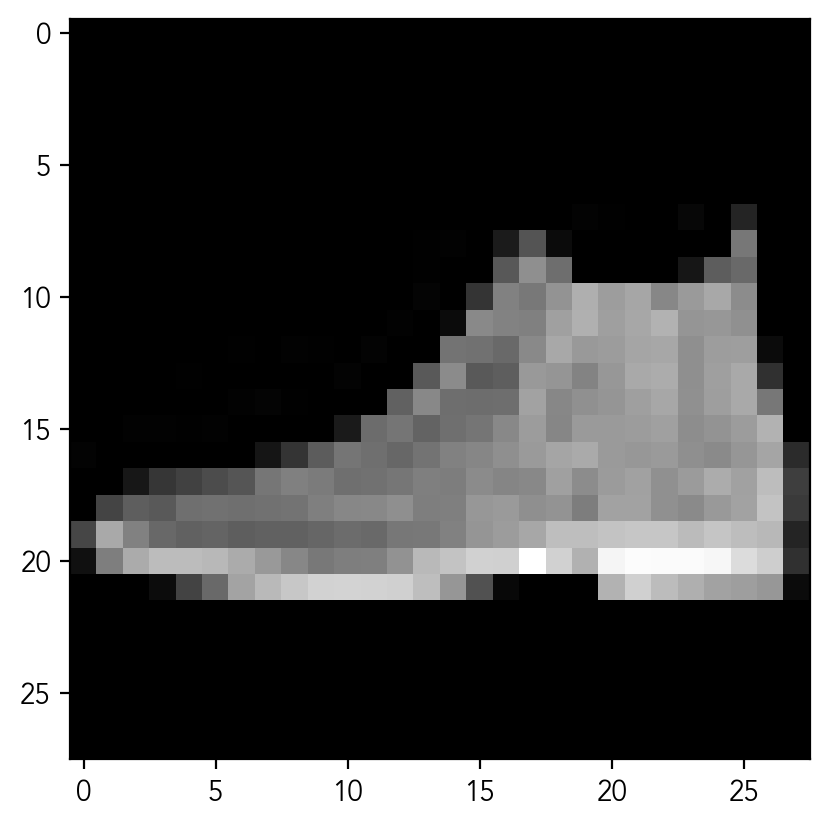

In [28]:
plt.imshow(X_test[0], cmap='gray')

In [29]:
# CNN

In [30]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# Load dataset
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Shape
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0 

# Model
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)         

In [32]:
# Train
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5931 - accuracy: 0.7836 - val_loss: 0.4499 - val_accuracy: 0.8366
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4001 - accuracy: 0.8522 - val_loss: 0.3932 - val_accuracy: 0.8581
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3448 - accuracy: 0.8738 - val_loss: 0.3549 - val_accuracy: 0.8699
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3078 - accuracy: 0.8867 - val_loss: 0.3467 - val_accuracy: 0.8725
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2821 - accuracy: 0.8966 - val_loss: 0.3430 - val_accuracy: 0.8776
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2613 - accuracy: 0.9030 - val_loss: 0.3279 - val_accuracy: 0.8811
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2407 - accuracy: 0.9100 - val_loss: 0.3261 - val_ac

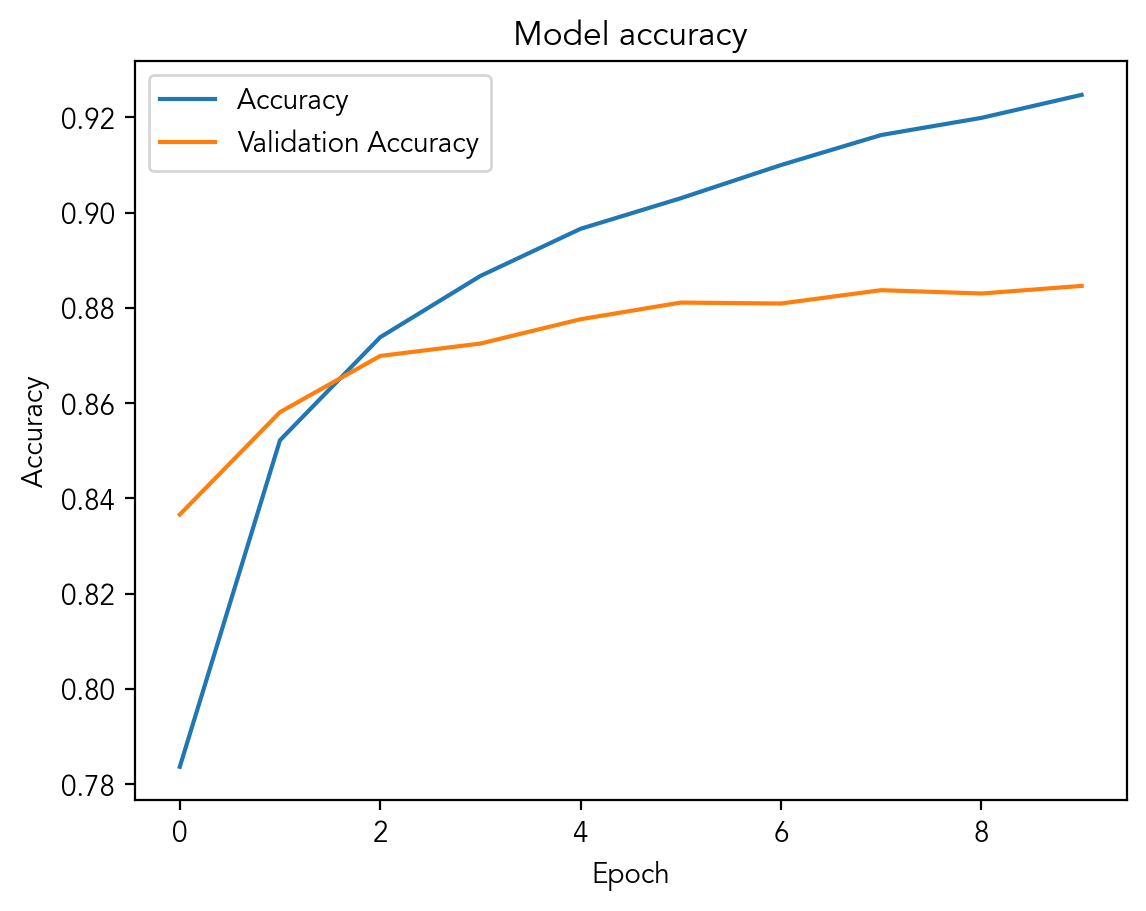

In [33]:
# Evaluate
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy'], loc='upper left')

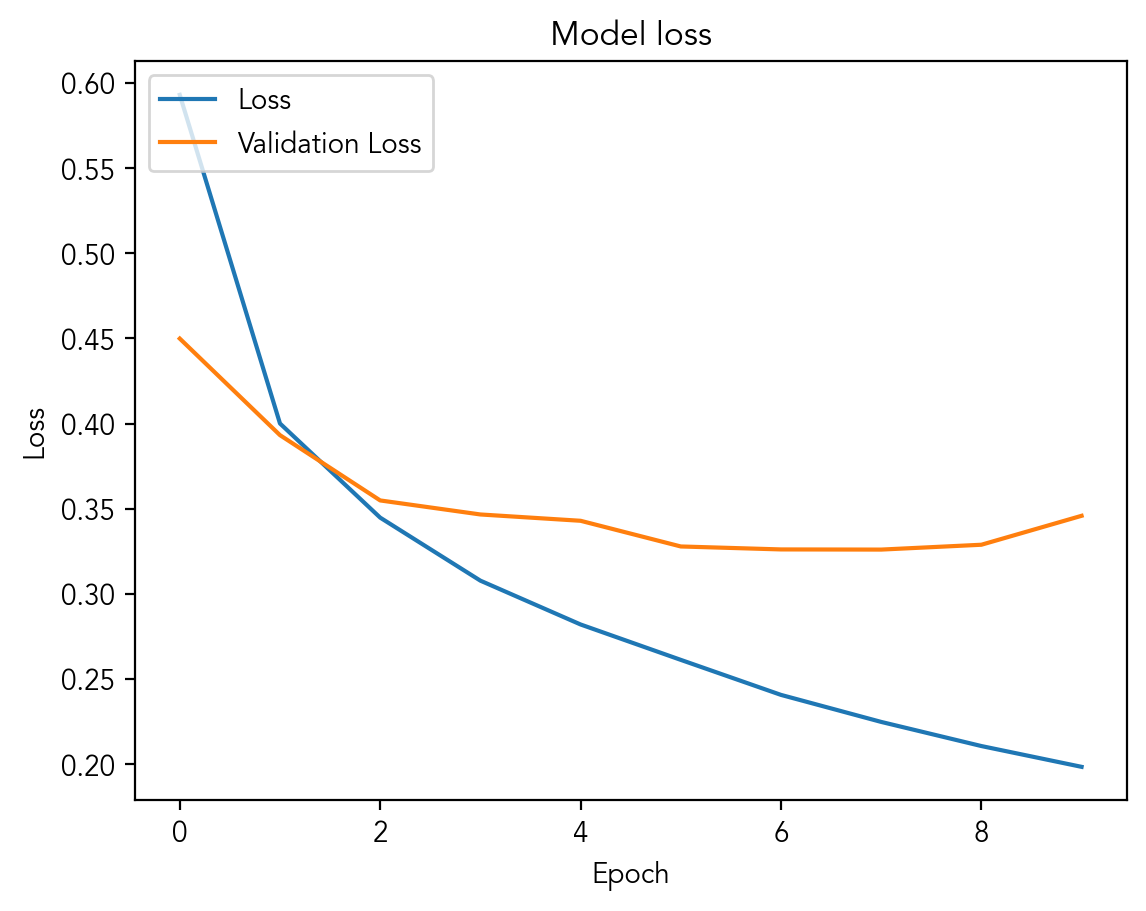

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Validation Loss'], loc='upper left')